# IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Split X train y test
from sklearn.model_selection import train_test_split

# Modelos para validación cruzada con cross_val_score y cross_validate
from sklearn.ensemble import RandomForestClassifier # Elegido
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos para validar por regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Validación de modelos:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Calificación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import SCORERS

# Para imputación categórica a numérica y predicción de columna numérica Destruction Level en Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Convertir columnas categóricas (Disaster Subtype, Origin, Associated Disaster) a numéricas para predecir Destruction Level Dis o Mag Value
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Pipeline
from sklearn.pipeline import Pipeline
import joblib # guardar pipeline

In [2]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [3]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar. Pensar en codificar por continente

## Codificación categórico a numérico


In [4]:

df['Disaster Type'].value_counts()

Flood         5808
Storm         4618
Earthquake    1597
Drought        803
Name: Disaster Type, dtype: int64

In [5]:
# Función personalizada para tratar la columna Disaster Type
def classify_disaster(Disaster_Type):
    if 'Drought' in Disaster_Type:
        return 1
    elif 'Earthquake' in Disaster_Type:
        return 2
    elif 'Storm' in Disaster_Type:
        return 3
    else:
        return 4
    
df['Disaster_int'] = df['Disaster Type'].apply(classify_disaster)
df['Disaster_int'].value_counts()

4    5808
3    4618
2    1597
1     803
Name: Disaster_int, dtype: int64

In [6]:
df.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Disaster_int
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,1900,0,0,1900,0,0,11000,0,0,1
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,1900,0,0,1900,0,0,1250000,0,0,1
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,1902,4,18,1902,4,18,2000,0,843726,2
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,1904,11,0,1904,11,0,0,0,0,3
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,1905,4,4,1905,4,4,20000,0,812477,2


<Axes: xlabel='Region', ylabel='Total Affected'>

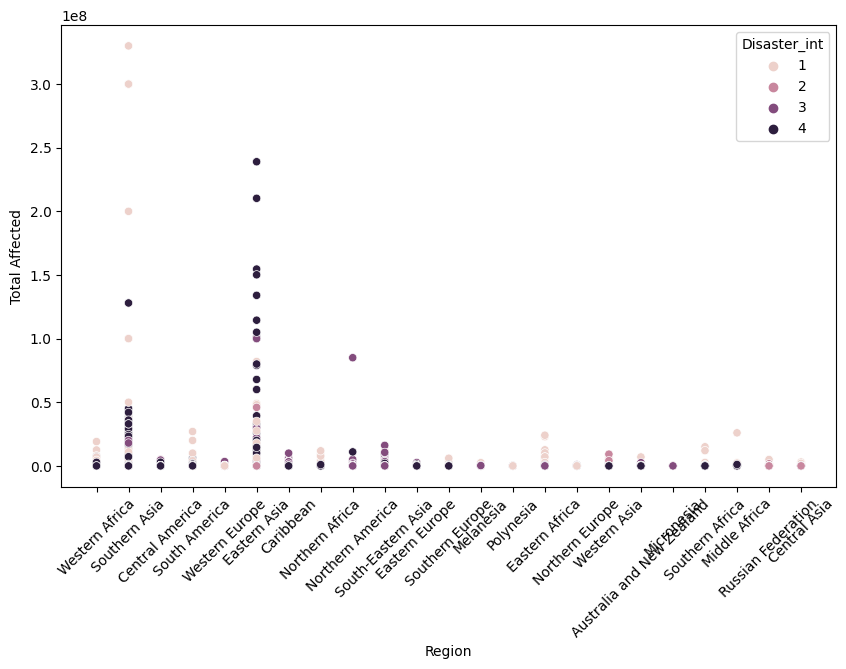

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(data=df, x='Region', y='Total Affected', hue='Disaster_int')

In [20]:
# Función personalizada para tratar la columna Region
def classify_disaster(Region):
    if 'Western Africa' in Region:
        return 1
    elif 'Southern Asia' in Region:
        return 2
    elif 'Central America' in Region:
        return 3
    elif 'South America' in Region:
        return 4
    elif 'Western Europe' in Region:
        return 5
    elif 'Eastern Asia' in Region:
        return 6
    elif 'Caribbean' in Region:
        return 7
    elif 'Northern Africa' in Region:
        return 8
    elif 'Northern America' in Region:
        return 9
    elif 'South-Eastern Asia' in Region:
        return 10
    elif 'Eastern Europe' in Region:
        return 11
    elif 'Southern Europe' in Region:
        return 12
    elif 'Melanesia' in Region:
        return 13
    elif 'Polynesia' in Region:
        return 14
    elif 'Eastern Africa' in Region:
        return 15
    elif 'Northern Europe' in Region:
        return 16
    elif 'Western Asia' in Region:
        return 17
    elif 'Micronesia' in Region:
        return 18
    elif 'Australia and New Zealand' in Region:
        return 19
    elif 'Southern Africa' in Region:
        return 20
    elif 'Middle Africa' in Region:
        return 21
    elif 'Russian Federation' in Region:
        return 22
    else:
        return 23
    
df['Region_int'] = df['Region'].apply(classify_disaster)
df['Region_int'].value_counts()

6     3284
2     1653
9     1093
4      988
15     837
3      683
7      584
12     482
1      462
17     427
5      418
11     382
8      257
19     239
21     222
13     203
20     182
16     167
23      91
14      82
22      50
18      40
Name: Region_int, dtype: int64

In [23]:
df_red = df[['Disaster Type', 'Region', 'Continent', 'Start Year', 'Total Deaths', 'Total Affected', 'Total Damages Adj', 'Disaster_int', 'Region_int']]
df_red.head()

,Disaster Type,Region,Continent,Start Year,Total Deaths,Total Affected,Total Damages Adj,Disaster_int,Region_int
0,Drought,Western Africa,Africa,1900,11000,0,0,1,1
1,Drought,Southern Asia,Asia,1900,1250000,0,0,1,2
2,Earthquake,Central America,Americas,1902,2000,0,843726,2,3
3,Storm,Southern Asia,Asia,1904,0,0,0,3,2
4,Earthquake,Southern Asia,Asia,1905,20000,0,812477,2,2


In [25]:
df_red.shape

(12826, 9)

In [26]:
df_region= pd.get_dummies(df['Region'])
df_region.head()

,Australia and New Zealand,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Eastern Europe,Melanesia,Micronesia,Middle Africa,...,Polynesia,Russian Federation,South America,South-Eastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df = pd.concat([df_red, df_region], axis=1)
df.head(2)

,Disaster Type,Region,Continent,Start Year,Total Deaths,Total Affected,Total Damages Adj,Disaster_int,Region_int,Australia and New Zealand,...,Polynesia,Russian Federation,South America,South-Eastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
0,Drought,Western Africa,Africa,1900,11000,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Drought,Southern Asia,Asia,1900,1250000,0,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

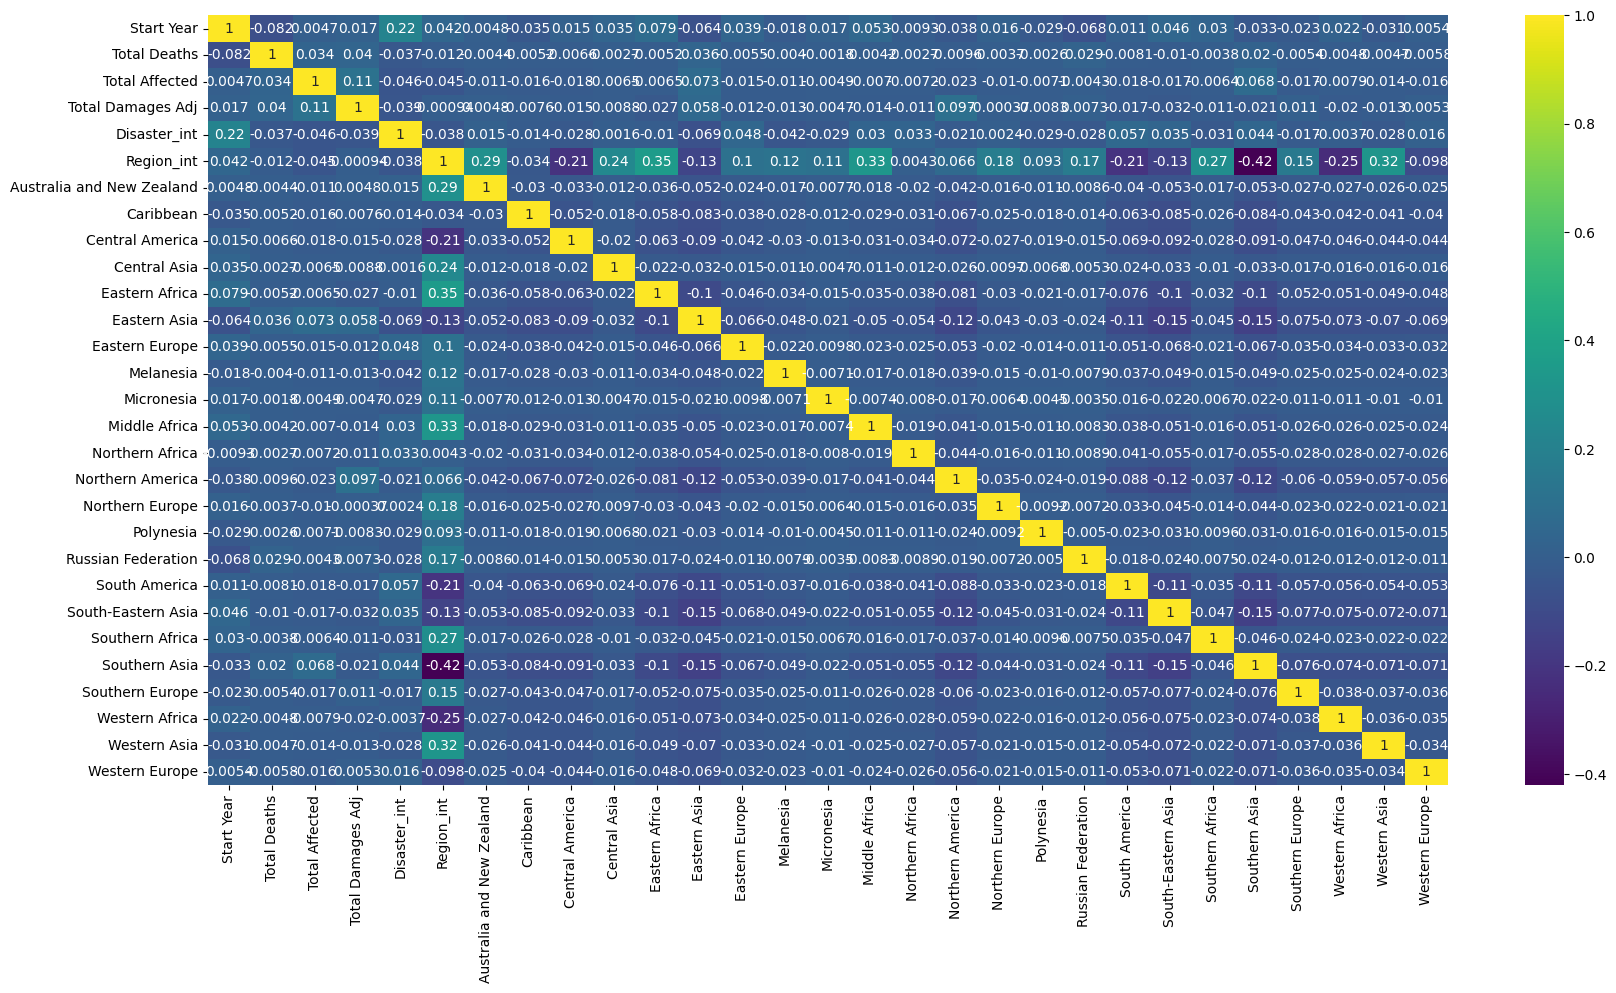

In [29]:
plt.figure(figsize=(20,10))
df_corr = df.corr(numeric_only = True)
sns.heatmap(df_corr, annot=True, cmap='viridis')

# REGRESION LINEAL MÚLTIPLE CON START YEAR, REGION, DISASTER TYPE


In [31]:
X = df[['Start Year', 'Region_int', 'Disaster_int']]
y= df['Total Affected']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred, squared=False)}")

mae: 1195848.42101741
rmse: 6618224.740846002
